### 신입교육세션 회귀분석 실습과 과제
by DA 22기 이해인, DA 23기 최정현

1. 실습
- diabetes 데이터를 선형회귀식을 사용해 분석해봅시다!


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

pip install matplotlib

In [3]:
pip install statsmodels

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('diabetes_XY.csv', index_col = 0)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:


#1 - formula 명시하지 않는 방법
Y = data.iloc[:, -1]
X = data.iloc[:, :-1]
X = sm.add_constant(X)

model = sm.OLS(Y, X)
res = model.fit()

print(res.summary())


                             OLS Regression Results                            
Dep. Variable:     disease_progression   R-squared:                       0.518
Model:                             OLS   Adj. R-squared:                  0.507
Method:                  Least Squares   F-statistic:                     46.27
Date:                 Fri, 19 Jan 2024   Prob (F-statistic):           3.83e-62
Time:                         06:02:40   Log-Likelihood:                -2386.0
No. Observations:                  442   AIC:                             4794.
Df Residuals:                      431   BIC:                             4839.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.06

In [8]:
#2 - R처럼 formula 사용하기 (다중회귀에서 변수 변경할 때 보다 편리함)
form_mod = ols('disease_progression ~ age + sex + bmi + bp + s1 + s2 + s3 + s4 + s5 + s6', data = data)
res2 = form_mod.fit()

print(res2.summary())

                             OLS Regression Results                            
Dep. Variable:     disease_progression   R-squared:                       0.518
Model:                             OLS   Adj. R-squared:                  0.507
Method:                  Least Squares   F-statistic:                     46.27
Date:                 Fri, 19 Jan 2024   Prob (F-statistic):           3.83e-62
Time:                         06:02:40   Log-Likelihood:                -2386.0
No. Observations:                  442   AIC:                             4794.
Df Residuals:                      431   BIC:                             4839.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.06

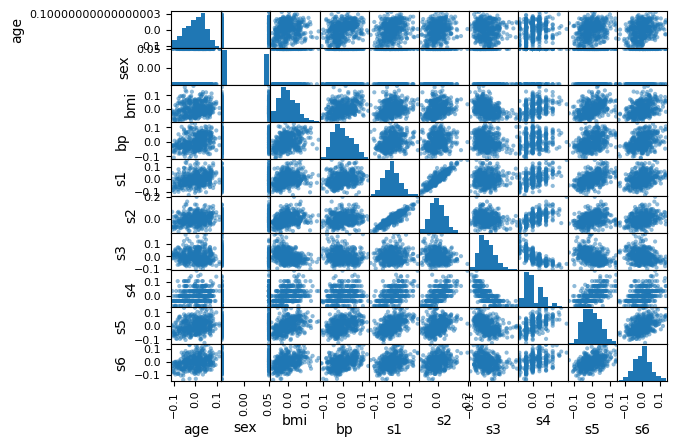

In [ ]:
# 산점도 행렬 그리기 - 다중공선성 확인
X_ = X.iloc[:, 1:]
pd.plotting.scatter_matrix(X_)
plt.show()

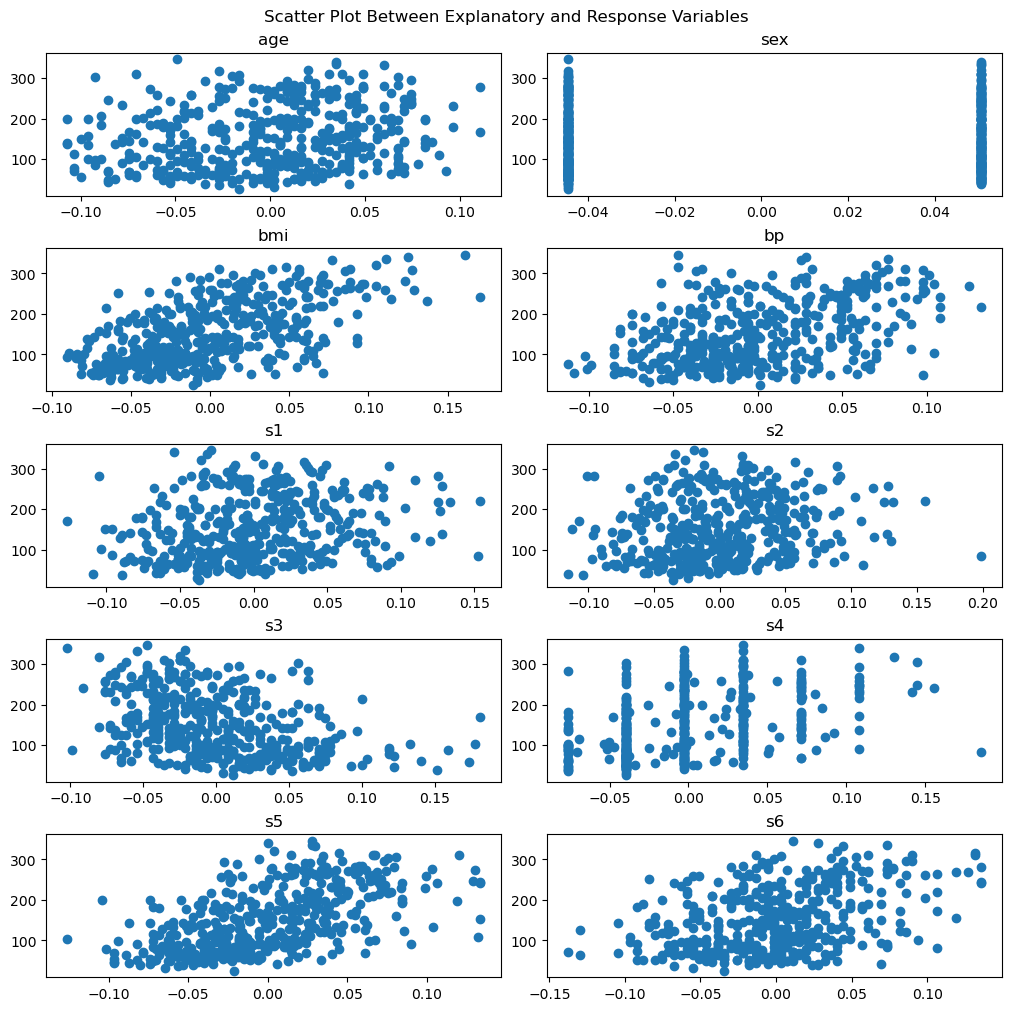

In [ ]:
# 일반 산점도 한꺼번에 그리기

def draw_scatter(ii, jj, title):
    X_cols = np.array(X_.columns).reshape(ii,-1)
    fig, axs = plt.subplots(ii,jj, figsize = (10,10), layout = 'constrained')
    fig.suptitle(title)
    axs_list = [(i,j) for i in range(0,ii) for j in range(0,jj)]
    for ax in axs_list:
        axs[ax].set_title(X_cols[ax])
        axs[ax].scatter(X_[X_cols[ax]], Y)
    plt.show()

draw_scatter(5, 2, "Scatter Plot Between Explanatory and Response Variables")

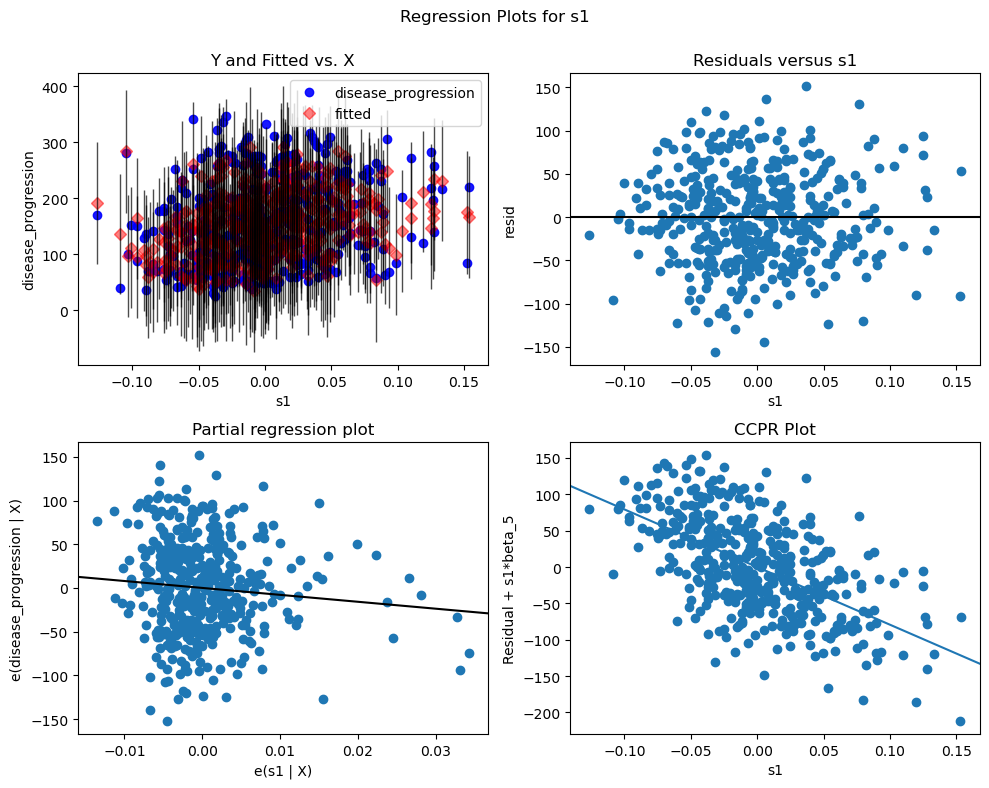

In [ ]:
#잔차도 + 다른 여러 그림 그리기
fig = plt.figure(figsize=(10, 8))
fig = sm.graphics.plot_regress_exog(form_mod.fit(), 's1', fig=fig)

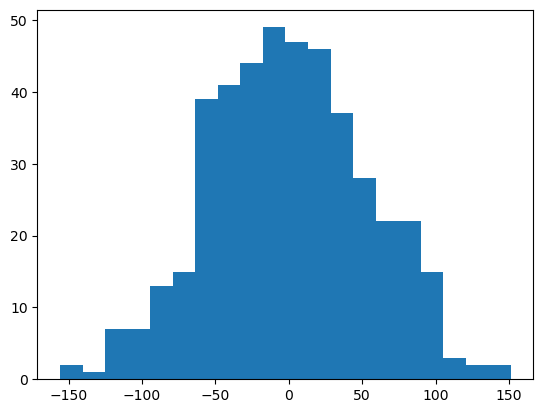

In [ ]:
#잔차 히스토그램
residuals = Y - res.predict()
plt.hist(residuals, bins = 20)
plt.show()

In [ ]:
#다중공선성 확인
vif = pd.DataFrame()
vif['VIF Factors'] = [variance_inflation_factor(X_, i)for i in range(X_.shape[1])]
vif['features'] = X_.columns
vif['is_vif'] = vif['VIF Factors'] > 10
vif = vif.sort_values("VIF Factors").reset_index(drop=True)
vif

2. 과제

- 'Student_Performance.csv'를 이용해 다중선형회귀분석을 진행하세요!


In [52]:
# 데이터 불러오기
df = pd.read_csv('Student_Performance.csv')

In [10]:
df
# 첫번째 열은 index이므로 쓰지 않는다

,Unnamed: 0,Study_Hours,Prev_Scores,Sleep_Hours,Sample_Practice,PI,Extracurriculars
0,0,7,99,9,1,91.0,1
1,1,4,82,4,2,65.0,0
2,2,8,51,7,2,45.0,1
3,3,5,52,5,2,36.0,1
4,4,7,75,8,5,66.0,0
...,...,...,...,...,...,...,...
9995,9995,1,49,4,2,23.0,1
9996,9996,7,64,8,5,58.0,1
9997,9997,6,83,8,5,74.0,1
9998,9998,9,97,7,0,95.0,1


2.1. 반응변수를 PI로 하고, 설명변수들을 그 외 모든 변수로 설정한 다중선형회귀분석을 진행하고 summary를 print하세요.

In [11]:
#OLS

Y = df['PI']
X = df.drop(['PI'], axis = 1)
X = sm.add_constant(X)

model = sm.OLS(Y, X)
res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.464e+05
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        06:19:34   Log-Likelihood:                -21306.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9993   BIC:                         4.268e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -34.1049      0.132  

2.2. 반응변수를 PI로 하고, 설명변수들을 Study_Hours로 설정한 단순선형회귀분석을 진행하고 summary를 print하세요.

In [13]:
#OLS

Y = df['PI']
X = df['Study_Hours']
X = sm.add_constant(X)

model = sm.OLS(Y, X)
res = model.fit()

print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1623.
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        06:20:04   Log-Likelihood:                -42992.
No. Observations:               10000   AIC:                         8.599e+04
Df Residuals:                    9998   BIC:                         8.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          41.3792      0.387    106.890      

2.3. (2.1)과 (2.2)의 분석을 비교하고 Study_Hours와 PI의 관계를 짧게, 자유롭게 설명해보세요.

**이동렬-> 설명변수를Study_Hours로만 두고 진행했을 때는 R squared 값이 0.140, index를 제외한 전체를 포함시켰을 땐 0.989가 나온 것으로 보아 Study_Hours는 PI를 잘 설명하지 못하는 변수이다.**

[Optional!] 2.4. 자유롭게 산점도, 잔차도 등 여러 그림과 추가로 진행하고 싶은 진단들을 진행한 후 이 변수들을 이런 선형 모형의 가정에 만족하는 지 설명해주세요.

**-> 선형모형의 가정 1. 선형성, 2. 등분산성, 3. 정규성, 4.독립성**

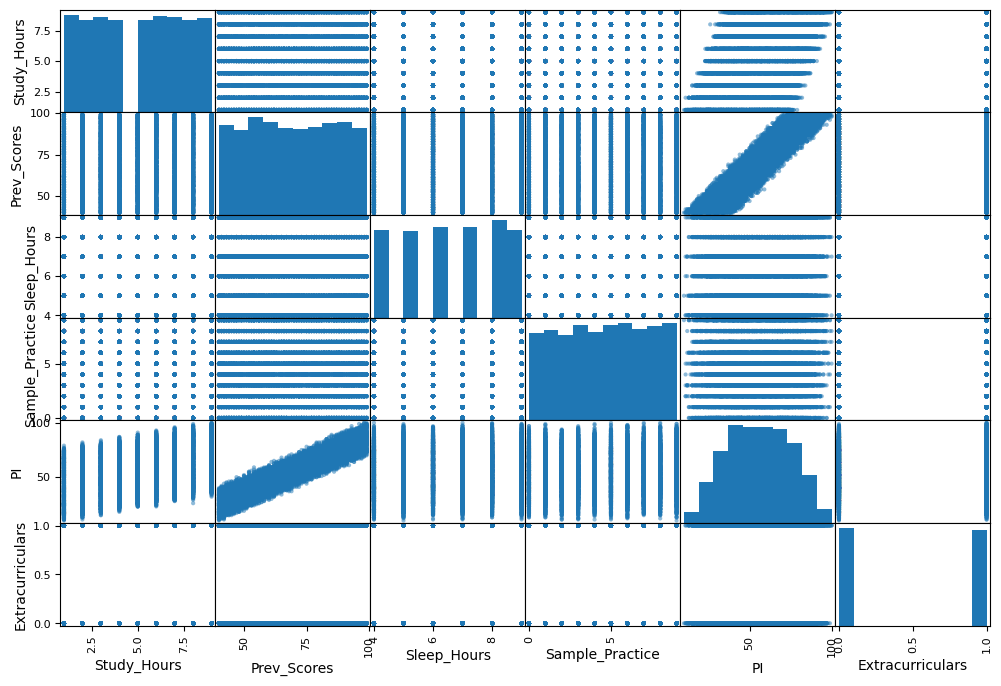

In [53]:
# 산점도 행렬 그리기 - 다중공선성 확인/선형성 확인 -> 변수끼리 다중공선성은 존재하지 않음
df = df.iloc[:, 1:]
pd.plotting.scatter_matrix(df_1, figsize=(12, 8))
plt.show()

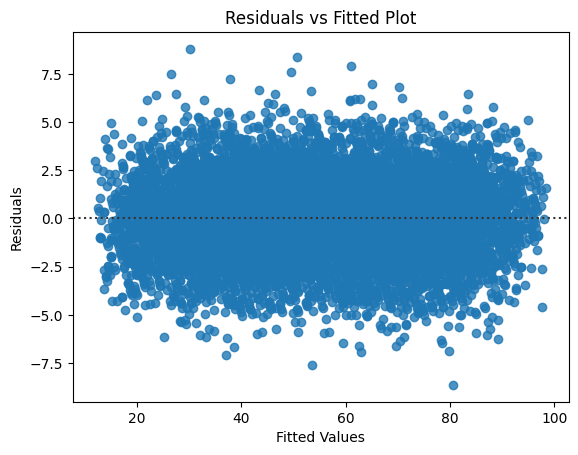

In [54]:
#1. 선형성 Test -> 별다른 관계 없어보임
import seaborn as sns

Y = df['PI']
X = df.drop(['PI'], axis = 1)

# 회귀 진단 (Residuals vs Fitted Plot)
import statsmodels.api as sm

# 독립 변수에 상수항 추가
X = sm.add_constant(X)

# OLS 모델 적합
model = sm.OLS(Y, X)
result = model.fit()

# 예측값과 잔차 계산
fitted_values = result.fittedvalues
residuals = result.resid

# Residuals vs Fitted Plot 그리기
sns.residplot(x=fitted_values, y=residuals)
plt.title('Residuals vs Fitted Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

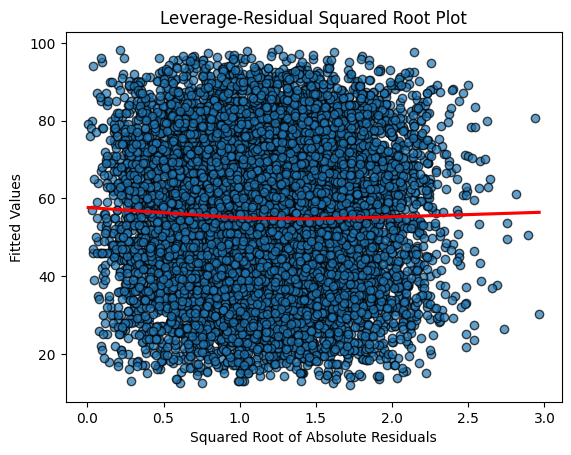

In [55]:
#2. 등분산성 체크 -> 등분산성 유지
import numpy as np

# 레버리지-잔차 제곱근 플롯
sqrt_abs_residuals = np.sqrt(np.abs(residuals))
plt.scatter(sqrt_abs_residuals, fitted_values, edgecolors='k', alpha=0.7)
sns.regplot(x=sqrt_abs_residuals, y=fitted_values, scatter=False, lowess=True, line_kws={'color': 'red'})
plt.title('Leverage-Residual Squared Root Plot')
plt.xlabel('Squared Root of Absolute Residuals')
plt.ylabel('Fitted Values')
plt.show()


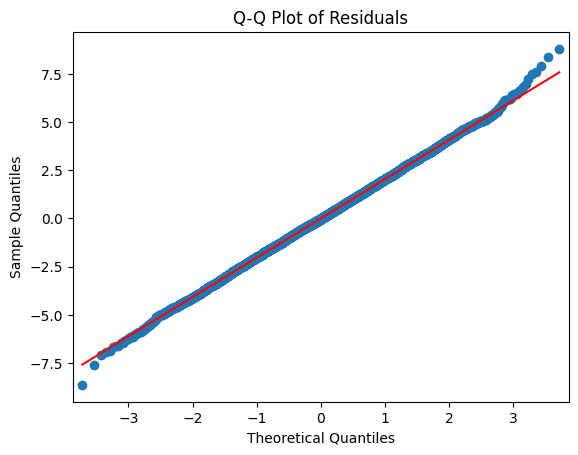

In [56]:
#3. 정규성 확인!
import scipy.stats as stats
import matplotlib.pyplot as plt

# OLS 모델 적합
model = sm.OLS(Y, X)
result = model.fit()

# 잔차 계산
residuals = result.resid

# Q-Q 플롯 그리기
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


In [57]:
#4. 독립성은 위의 OLS 테스트에서 더블린 왓슨 통계량으로도 확인가능하지만, 여기서도 코드로 확인
# Durbin-Watson 통계량 계산

durbin_watson_stat = sm.stats.stattools.durbin_watson(residuals)

# Durbin-Watson 통계량 출력
print(f'Durbin-Watson Statistic: {durbin_watson_stat}')


#오차항의 자기 상관관계 없음 -> 독립성 O


Durbin-Watson Statistic: 2.000900125068855


In [ ]:
# 변수는 얼마나 필요할까?

In [60]:
# 변수들의 모든 부분집합을 생성하고 각 조합에 대해 OLS 모델을 적합하여 R-squared 계산
# 계산 비용이 많이 늘어나므로 좋은 계산은 아니지만, 변수가 적으므로 시도

import itertools

df_2 = df.iloc[:, 1:]
df_2 = df.drop(['PI'], axis = 1)
max_r_squared = 0
best_combination = None
print(df_2)

for r in range(1, len(df_2.columns) - 1):  # 1개부터 모든 변수를 사용하는 조합까지 시도
    for combination in itertools.combinations(df_2.columns[:-1], r):
        # 독립 변수에 상수항 추가
        X = sm.add_constant(df_2[list(combination)])

        # OLS 모델 적합
        model = sm.OLS(Y, X)
        result = model.fit()

        # 현재 조합의 R-squared 계산
        current_r_squared = result.rsquared

        # 최대 R-squared와 해당하는 변수 조합 업데이트
        if current_r_squared > max_r_squared:
            max_r_squared = current_r_squared
            best_combination = combination

# 최대 R-squared와 해당하는 변수 조합 출력
print(f"Max R-squared: {max_r_squared}")
print(f"Best Combination: {best_combination}")


# 0.987..? OLS랑 별 차이가 없었다고 한다... 오히려 떨어졌음.

      Study_Hours  Prev_Scores  Sleep_Hours  Sample_Practice  Extracurriculars
0               7           99            9                1                 1
1               4           82            4                2                 0
2               8           51            7                2                 1
3               5           52            5                2                 1
4               7           75            8                5                 0
...           ...          ...          ...              ...               ...
9995            1           49            4                2                 1
9996            7           64            8                5                 1
9997            6           83            8                5                 1
9998            9           97            7                0                 1
9999            7           74            8                1                 0

[10000 rows x 5 columns]
Max R-squared: 0.987649772